In [1]:
import pandas as pd

filepath = './../data/dataset_site_info.parquet'
df = pd.read_parquet(filepath)
df = df[df['tier'] == 'AODSIM']

df.head()

,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier
2,/GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...,1114967,20200113,T2_FI_HIP,2.060427e+11,2020-01-14,2020-04-29,42.0,AODSIM
3,/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...,1247050,20200323,T2_US_Caltech,1.034198e+13,2020-03-23,2020-05-05,22.0,AODSIM
5,/SMS-T2bt-LLChipm_ctau-200_mLSP-1400_TuneCUETP...,1397254,20190925,T2_DE_DESY,1.866242e+11,2019-09-26,2020-12-31,22.0,AODSIM
7,/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-p...,1560259,20200524,T1_RU_JINR_Disk,1.618496e+12,2020-06-06,2020-09-29,18.0,AODSIM
8,/DYJetsToTauTau_ForcedMuDecay_M-50_TuneCP5_13T...,1106693,20181003,T2_FR_IPHC,5.941757e+11,2019-01-01,2019-02-13,42.0,AODSIM


In [2]:
from cmSim.tools.phy_to_pag import get_pag

datasets_df = df[['dataset_name']].drop_duplicates()
datasets_df['pag'] = datasets_df['dataset_name'].apply(get_pag)

In [3]:
name_to_pag = {row['dataset_name'] : row['pag'] for _, row in datasets_df.iterrows()}
df['pag'] = df['dataset_name'].apply(lambda name: name_to_pag[name])

df.head()

,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier,pag
2,/GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...,1114967,20200113,T2_FI_HIP,2.060427e+11,2020-01-14,2020-04-29,42.0,AODSIM,Forward and QCD
3,/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...,1247050,20200323,T2_US_Caltech,1.034198e+13,2020-03-23,2020-05-05,22.0,AODSIM,Forward and QCD
5,/SMS-T2bt-LLChipm_ctau-200_mLSP-1400_TuneCUETP...,1397254,20190925,T2_DE_DESY,1.866242e+11,2019-09-26,2020-12-31,22.0,AODSIM,Top-Physics
7,/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-p...,1560259,20200524,T1_RU_JINR_Disk,1.618496e+12,2020-06-06,2020-09-29,18.0,AODSIM,Forward and QCD
8,/DYJetsToTauTau_ForcedMuDecay_M-50_TuneCP5_13T...,1106693,20181003,T2_FR_IPHC,5.941757e+11,2019-01-01,2019-02-13,42.0,AODSIM,Forward and QCD


In [4]:
pag_to_label = {'B-Physics': 'B', 'Beyond-two-Generations': 'B2G', 'EXOTICA': 'EXO', 'Forward and QCD': 'QCD',
                'Higgs': 'HIG', 'SUSY': 'SUSY', 'Standard Model': 'SM', 'Top-Physics': 'TOP', 'UNKNOWN': 'UNKNOWN'}
label_to_color = {'B': 'blue', 'B2G': 'brown', 'EXO': 'purple', 'QCD': 'orange',
                  'HIG': 'grey', 'SUSY': 'red', 'SM': 'green', 'TOP': 'cyan', 'UNKNOWN': 'black'}

pags = list(set(df['pag']))
print(f'PAGs = {pags}')

PAGs = ['EXOTICA', 'UNKNOWN', 'Standard Model', 'Forward and QCD', 'SUSY', 'B-Physics', 'Beyond-two-Generations', 'Top-Physics', 'Higgs']


In [5]:
from datetime import date

date = date(2020, 12, 31)
df = df[(df['min_time'] <= date) & (date <= df['max_time'])]

get_country = lambda site: site.split('_')[1]
countries = list(set(df['node_name'].apply(get_country)))

print(f'number of countries = {len(countries)}')
print(countries)

number of countries = 25
['PT', 'FI', 'EE', 'RU', 'MY', 'HU', 'GR', 'AT', 'PK', 'PL', 'IN', 'ES', 'US', 'KR', 'CN', 'DE', 'BE', 'UK', 'BR', 'CH', 'FR', 'TR', 'TW', 'UA', 'IT']


In [6]:
datalakes = {'Switzerland': {'CH'},
             'West Europe': {'IT', 'FR', 'AT', 'DE', 'BE', 'PT', 'ES', 'UK'},
             'East Europe': {'GR', 'TR', 'HU', 'PL', 'FI', 'EE', 'UA', 'RU'},
             'USA': {'US'},
             'Brazil': {'BR'},
             'Asia': {'PK', 'IN', 'CN', 'TW', 'KR', 'MY'}}

country_to_datalake = {country: datalake
                       for country in countries
                       for datalake in datalakes
                       if country in datalakes[datalake]}
df['datalake'] = df['node_name'].apply(lambda site: country_to_datalake[get_country(site)])

df.head()

,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier,pag,datalake
5,/SMS-T2bt-LLChipm_ctau-200_mLSP-1400_TuneCUETP...,1397254,20190925,T2_DE_DESY,1.866242e+11,2019-09-26,2020-12-31,22.0,AODSIM,Top-Physics,West Europe
25,/TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-...,1263217,20200804,T2_UK_SGrid_RALPP,7.320993e+12,2020-08-05,2020-12-31,42.0,AODSIM,Forward and QCD,West Europe
60,/iDM_DarkPhotonToMuMu_Mchi-63p0_dMchi-6p0_ctau...,1582650,20200912,T1_DE_KIT_Disk,3.384104e+08,2020-09-13,2020-12-31,18.0,AODSIM,EXOTICA,West Europe
181,/b_bbar_4l_TuneCP5_13TeV-powheg-pythia8/RunIIS...,1574345,20201007,T1_ES_PIC_Disk,3.814823e+09,2020-10-08,2020-12-31,18.0,AODSIM,B-Physics,West Europe
208,/ggH_HToSSTo4l_MH-800_MS-50_ctauS-1000_TuneCUE...,1586674,20200930,T1_ES_PIC_Disk,5.056663e+09,2020-10-01,2020-12-31,18.0,AODSIM,Higgs,West Europe


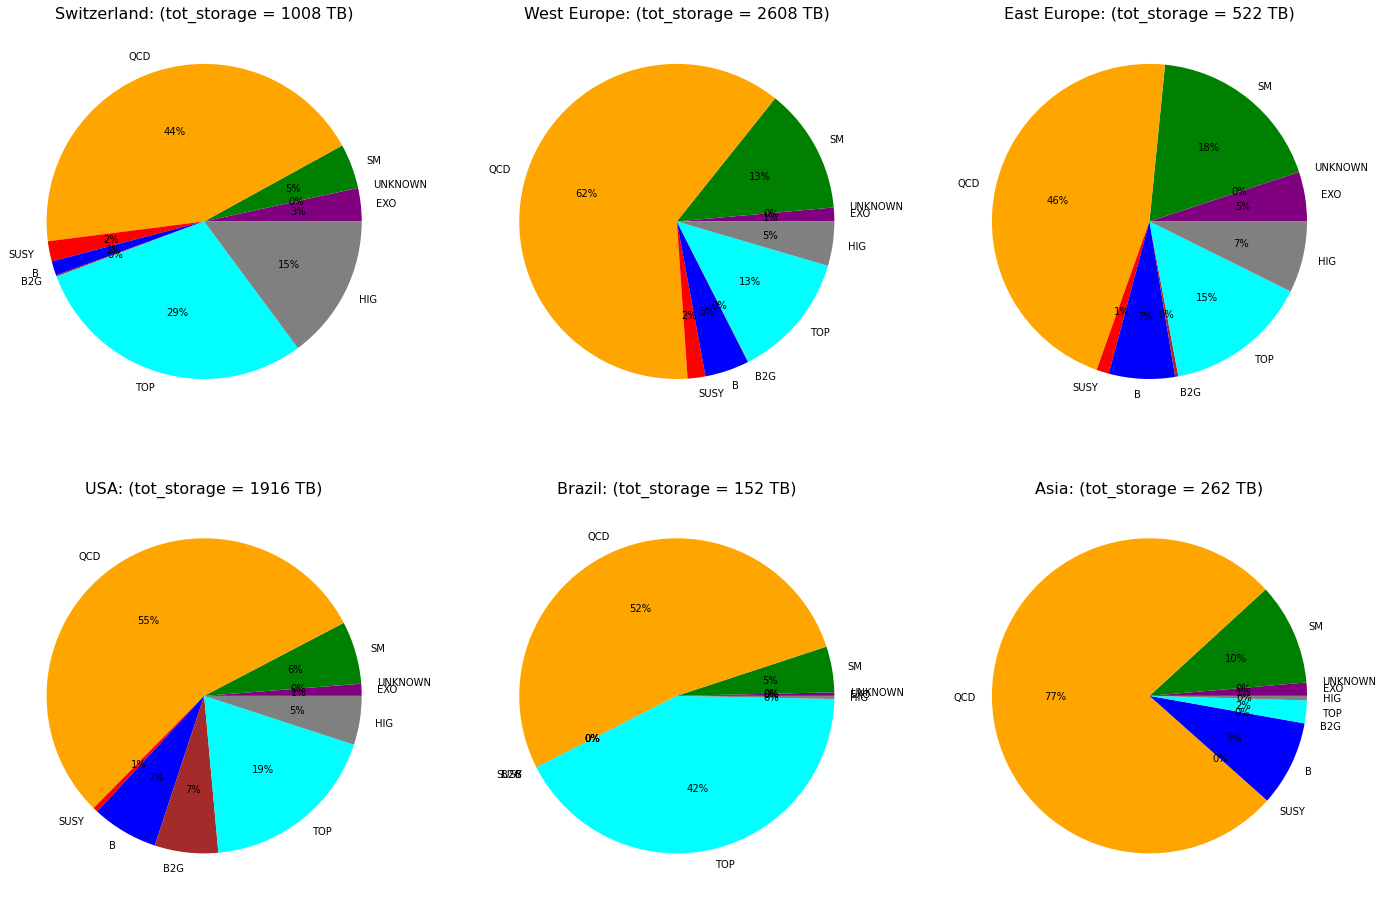

In [7]:
import pylab as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))
axs = axs.ravel()

labels = [pag_to_label[pag] for pag in pags]
colors = [label_to_color[lab] for lab in labels]

for i, datalake in enumerate(datalakes):
    lake_df = df[df['datalake'] == datalake]
    tot_size = round(lake_df['rep_size'].sum() / 1e12)
    data = [lake_df[lake_df['pag'] == pag]['rep_size'].sum() for pag in pags]
    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.0f%%', normalize=True)
    title = f'{datalake}: (tot_storage = {tot_size} TB)'
    axs[i].set_title(title, fontsize=16)

plt.savefig(fname='./../data/piecharts_aodsim.png', bbox_inches='tight')